# Machine learning - Detecção fraude cartão credito (ML_IEEE-CIS)

![img](https://github.com/RafaelGallo/ML_card_fraud/blob/main/img/SL-110820-37810-04.jpg?raw=true)

(**<a href="https://br.freepik.com/vetores-gratis/cartao-de-credito-entrando-no-conceito-de-transacao-digital-movel_22535508.htm#query=fraude%20cart%C3%A3o%20credito%20machine%20learning&position=7&from_view=search&track=ais">Imagem de starline</a> no Freepik**)

## Descrição

Imagine estar no caixa do supermercado com uma longa fila atrás de você, e o caixa anuncia em voz
alta que seu cartão foi recusado. Nesse momento, provavelmente você não está pensando na ciência
de dados que determinou seu destino. Envergonhado e certo de que tem fundos para cobrir tudo o
que é necessário para uma festa épica de nachos para 50 dos seus amigos mais próximos, você tenta
passar o cartão novamente.

Mesmo resultado. Enquanto você se afasta e permite que o caixa atenda o próximo cliente, você
recebe uma mensagem de texto do seu banco. "Aperte 1 se você realmente tentou gastar $500 em
queijo cheddar." Embora possa ser inconveniente (e muitas vezes embaraçoso) no momento, esse
sistema de prevenção de fraudes está economizando milhões de dólares por ano para os
consumidores. Pesquisadores da Sociedade de Inteligência Computacional do IEEE (IEEE-CIS)
desejam melhorar esse número, ao mesmo tempo em que melhoram a experiência do cliente. Com
uma detecção de fraudes de maior precisão, você pode aproveitar seus chips sem complicações.

A IEEE-CIS trabalha em várias áreas de inteligência artificial e aprendizado de máquina, incluindo
redes neurais profundas, sistemas difusos, computação evolutiva e inteligência de enxame. Hoje, eles
estão se associando à principal empresa de serviços de pagamento do mundo, a Vesta Corporation,
em busca das melhores soluções para a indústria de prevenção de fraudes, e agora você está
convidado a participar do desafio.

## Objetivo

Nesta competição, você avaliará modelos de aprendizado de máquina em um grande conjunto de
dados desafiador. Os dados provêm de transações de comércio eletrônico do mundo real da Vesta e
contêm uma ampla gama de recursos, desde o tipo de dispositivo até as características do produto.
Você também tem a oportunidade de criar novos recursos para melhorar seus resultados. Se for
bem-sucedido, você melhorará a eficácia dos alertas de transações fraudulentas para milhões de
pessoas em todo o mundo, ajudando centenas de milhares de empresas a reduzir suas perdas com
fraudes e aumentar sua receita. E, é claro, você salvará pessoas de festa, assim como você, do
incômodo de falsos positivos.

A Vesta Corporation forneceu o conjunto de dados para esta competição. A Vesta Corporation é a
precursora em soluções de pagamento de comércio eletrônico garantidas. Fundada em 1995, a Vesta
foi pioneira no processo de transações de pagamento de cartão não presente totalmente garantidas
para a indústria de telecomunicações. Desde então, a Vesta expandiu firmemente suas capacidades
de ciência de dados e aprendizado de máquina em todo o mundo e consolidou sua posição como
líder em pagamentos de comércio eletrônico garantidos. Hoje, a Vesta garante mais de $18 bilhões
em transações anualmente. Foto do cabeçalho de Tim Evans no Unsplash

## Avaliação

As submissões são avaliadas com base na área sob a curva ROC entre a probabilidade prevista e o
alvo observado.

## Arquivo de Submissão

Para cada TransactionID no conjunto de teste, você deve prever uma probabilidade para a variável
isFraud. O arquivo deve conter um cabeçalho e ter o seguinte formato:

TransactionID isFraud
3663549         0.5
3663550         0.5
3663551         0.5


## Descrição do Conjunto de Dados

Nesta competição, você está prevendo a probabilidade de que uma transação online seja
fraudulenta, conforme indicado pelo alvo binário isFraud. Os dados estão divididos em dois arquivos,
identity (identidade) e transaction (transação), que são unidos pelo TransactionID. Nem todas as
transações têm informações de identidade correspondentes.

## Recursos categóricos - transação

● ProductCD

● card1 - card6

● addr1 addr2

● P_emaildomain

● R_emaildomain

● M1 - M9

## Características Categóricas - Identidade

● DeviceType

● DeviceInfo

● id_12 - id_38

O recurso TransactionDT é um timedelta de uma determinada data e hora de referência (não um carimbo de data/hora real). Você pode ler mais sobre os dados nesta postagem do anfitrião da competição.

## Arquivos

● train_{transaction, Identity}.csv - o conjunto de treinamento

● test_{transaction, Identity}.csv - o conjunto de teste (você deve prever o valor isFraud
para essas observações)

● sample_submission.csv - um arquivo de envio de amostra no formato correto

## Citação

Addison Howard, Bernadette Bouchon-Meunier, IEEE CIS, inversão, John Lei, Lynn@Vesta,
Marcus2010, Prof. Hussein Abbass. (2019). IEEE-CIS Fraud Detection. Kaggle.

https://kaggle.com/competitions/ieee-fraud-detection

# Pacotes

In [1]:
# Instalando pacotes
!pip install watermark
!pip install plotly
!pip install imbalanced-learn

## Importação da biblioteca

In [2]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (20, 10)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 15
m.rcParams['xtick.labelsize'] = 15
m.rcParams['ytick.labelsize'] = 15
m.rcParams['text.color'] = 'k'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print()
print('Versão python neste Jupyter Notebook:', python_version())
print()

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions


Versão python neste Jupyter Notebook: 3.8.18

Author: Versões das bibliotecas

plotly    : 5.18.0
numpy     : 1.24.4
watermark : 2.4.3
re        : 2.2.1
seaborn   : 0.12.2
pandas    : 1.5.3
matplotlib: 3.6.0



# Carregamento, compreensão e limpeza de dados

In [3]:
# Helper function
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('O uso de memória do dataframe é {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('O uso de memória após a otimização é: {:.2f} MB'.format(end_mem))
    print('Diminuiu em {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Dataset

In [4]:
# Dados treino
data_transaction = pd.read_csv("data/train_transaction.csv")

# Dados teste 
data_test_transaction = pd.read_csv("data/test_transaction.csv")

# Dadods identity
train_identity = pd.read_csv("data/train_identity.csv")

In [5]:
# Base dados train_transaction
data_transaction = pd.read_csv('data/train_transaction.csv')
print(data_transaction.shape)
data_transaction = reduce_mem_usage(data_transaction)

# Visualizando
print(data_transaction.shape)

# Visualizando 
data_transaction.head()

(590540, 394)
O uso de memória do dataframe é 1775.15 MB
O uso de memória após a otimização é: 487.16 MB
Diminuiu em 72.6%
(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
# Base dados train_identity 
data_train_identity = pd.read_csv('data/train_identity.csv')
print(data_train_identity.shape)

data_train_identity = reduce_mem_usage(data_train_identity)
data_train_identity.head()

(144233, 41)
O uso de memória do dataframe é 45.12 MB
O uso de memória após a otimização é: 10.00 MB
Diminuiu em 77.8%


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
# Merge dataset
df_train = pd.merge(data_transaction, data_train_identity, how='left')
print(df_train.shape)

# Lendo dados
len_train_df = len(df_train)

# Excluindo
del data_transaction, data_train_identity
df_train.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [8]:
# Carregando dataset test transaction
df_test_transaction = pd.read_csv('data/test_transaction.csv')
print(df_test_transaction.shape)
df_test_transaction = reduce_mem_usage(df_test_transaction)

# Carregando dataset train identity
test_identity = pd.read_csv('data/train_identity.csv')
print(test_identity.shape)
test_identity = reduce_mem_usage(test_identity)

# Merge dados 
test_df = pd.merge(df_test_transaction, test_identity, how='left')
test_df.columns = df_train.drop('isFraud', axis=1).columns

print(test_df.shape)
del df_test_transaction, test_identity
test_df.head()

(506691, 393)
O uso de memória do dataframe é 1519.24 MB
O uso de memória após a otimização é: 425.24 MB
Diminuiu em 72.0%
(144233, 41)
O uso de memória do dataframe é 45.12 MB
O uso de memória após a otimização é: 10.00 MB
Diminuiu em 77.8%
(506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0000,47.950001,0.0000,0.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226

In [9]:
# deploy 
data_submission = pd.DataFrame({'TransactionID':test_df.TransactionID})
print(data_submission.shape)

(506691, 1)


In [10]:
# Dados treino visualizando os 5 primeiros dados
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [11]:
# Dados treino visualizando os 5 ultimos dados
df_train.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
590535,3577535,0,15811047,49.000000,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,56.0,T,T,T,M0,T,F,F,F,T,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0,47.9375,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.9375,0.0,0.0,47.9375,47.9375,47.9375,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.500000,W,10444,225.0,1

In [12]:
# Info dados 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: category(31), float16(354), float32(45), int16(1), int32(2), int8(1)
memory usage: 530.1 MB


In [13]:
# Visualizando linhas e colunas
df_train.shape

(590540, 434)

In [14]:
# Tipo de dados
df_train.dtypes

TransactionID        int32
isFraud               int8
TransactionDT        int32
TransactionAmt     float16
ProductCD         category
                    ...   
id_36             category
id_37             category
id_38             category
DeviceType        category
DeviceInfo        category
Length: 434, dtype: object

# Outliers
## Valores discrepantes do valor da transação

- Está considerando valores discrepantes que são maiores que 3 vezes o padrão da média

- Identified lowest outliers: 0

- Identified upper outliers: 10097

- Total outlier observations: 10097

- Non-outlier observations: 580443

- Total percentual of Outliers:  1.7395

Se considerarmos apenas valores entre >= 0 a 800 evitaremos os outliers e teremos mais confiança em nossa distribuição. Temos 10 mil linhas com valores discrepantes que representam 1,74% do total de linhas.

## Agora, vamos conhecer as características do produto

- Produtos de distribuição 

- Distribuição de Fraudes por Produto 

- Há diferença entre valores de transações em produtos?

In [15]:
df_train['TransactionAmt'] = df_train['TransactionAmt'].astype(float)

total = len(df_train)

total_amt = df_train.groupby(['isFraud'])['TransactionAmt'].sum().sum()
total_amt

79739049.73706055

In [16]:
tmp = pd.crosstab(df_train['ProductCD'], 
                  df_train['isFraud'], 
                  normalize='index') * 100
tmp = tmp.reset_index()

tmp.rename(columns={0:'NoFraud', 
                    1:'Fraud'}, 
           inplace=True)

tmp

isFraud,ProductCD,NoFraud,Fraud
0,C,88.312731,11.687269
1,H,95.233769,4.766231
2,R,96.217406,3.782594
3,S,94.100447,5.899553
4,W,97.960061,2.039939


# Limpeza dados

In [17]:
# Verificação de valores faltantes
data_df = pd.concat([df_train.drop(columns=['isFraud', 
                                            'TransactionID']),
                     test_df.drop(columns='TransactionID')])
print(data_df.shape)

(1097231, 432)


In [18]:
# Variável dependente
y = df_train['isFraud']
print(y.shape)

(590540,)


In [19]:
# Eliminando colunas com mais de 20% de valores faltantes
data_1 = data_df.isnull().sum()/len(data_df)
data_df_2 = data_df.drop(columns=data_1[data_1 > 0.2].index)
del data_df, df_train, test_df
print(data_df_2.shape)

(1097231, 180)


In [20]:
# Filtrando dados numéricos
data_df_2_nb = data_df_2.select_dtypes(include=np.number)
print(data_df_2_nb.shape)

(1097231, 176)


In [21]:
# Filtrando dados categóricos
data_df_2_ct = data_df_2.select_dtypes(exclude=np.number)
print(data_df_2_ct.shape)
del data_df_2

(1097231, 4)


In [22]:
# Preenchendo valores faltantes por mediana para colunas numéricas
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

data_num_df = pd.DataFrame(imp_median.fit_transform(data_df_2_nb), columns=data_df_2_nb.columns)
del data_df_2_nb
print(data_num_df.shape)

(1097231, 176)


In [23]:
# Preenchendo valores ausentes pelo valor mais frequente para colunas categóricas
imp_max = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_simpler_cat = pd.DataFrame(imp_max.fit_transform(data_df_2_ct), columns=data_df_2_ct.columns)
del data_df_2_ct
print(data_simpler_cat.shape)

(1097231, 4)


In [24]:
# Contratando coluna númerico
data_cleaned = pd.concat([data_num_df, data_simpler_cat], axis=1)
del data_num_df, data_simpler_cat

In [25]:
# Verificando valores ausentes
print(f'Total missing values: {data_cleaned.isnull().sum().sum()}')
print(data_cleaned.shape)
data_cleaned.head()

Total missing values: 0
(1097231, 180)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,P_emaildomain
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,W,discover,credit,gmail.com
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W,mastercard,credit,gmail.com
2,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W,visa,debit,outlook.com
3,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,W,mastercard,debit,yahoo.com
4,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0

In [26]:
# Salvando 
data_cleaned.to_csv("dataset_cleaned.csv")

# Pré-processamento

In [27]:
# One-hot com os dados
combined_data = pd.get_dummies(data_cleaned, drop_first=True)
print(combined_data.shape)
del data_cleaned
combined_data.head()

(1097231, 245)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_scranton.edu,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [28]:
# Separando dados treino teste
X = combined_data.iloc[:len_train_df]
print(X.shape)

test = combined_data.iloc[len_train_df:]
print(test.shape)
del combined_data

(590540, 245)
(506691, 245)


# Devisão treino teste

In [29]:
train = pd.concat([X, y], axis=1)
train.sort_values('TransactionDT', inplace=True)

In [30]:
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']

In [31]:
# Divisão de validação de trem baseada em tempo com 20% de dados no conjunto de validação
splitting_index = int(0.8*len(X))

X_train = X.iloc[:splitting_index].values
X_val = X.iloc[splitting_index:].values
y_train = y.iloc[:splitting_index].values
y_val = y.iloc[splitting_index:].values

test = test.values

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
del y, train

(472432, 245) (118108, 245) (472432,) (118108,)


# Feature engineering

Feature engineering é o processo de criar novas variáveis ou características (features) a partir dos dados brutos disponíveis, com o objetivo de melhorar o desempenho dos modelos de machine learning. É uma etapa crucial no desenvolvimento de modelos preditivos, pois a qualidade e relevância das features podem ter um impacto significativo na precisão e na capacidade de generalização do modelo.

O processo de feature engineering envolve diversas técnicas, tais como:

Criação de novas features: Criar variáveis a partir das existentes que possam conter informações mais relevantes para o modelo.

Transformação de variáveis: Aplicar transformações matemáticas, como logaritmos, raízes quadradas, etc., para tornar os dados mais adequados para o modelo.

Normalização e padronização: Escalonar ou padronizar as features para que estejam em uma escala comparável e não dominem umas sobre as outras durante o treinamento do modelo.

Tratamento de dados ausentes ou outliers: Preencher valores ausentes ou lidar com outliers de maneira apropriada para evitar que influenciem negativamente o desempenho do modelo.

Codificação de variáveis categóricas: Converter variáveis categóricas em um formato numérico para que possam ser utilizadas em modelos de machine learning.

Extração de características: Identificar e extrair informações relevantes dos dados brutos, como contagem de palavras, frequência de ocorrência, entre outros.

Seleção de features: Escolher as features mais importantes ou relevantes para o modelo, removendo as que podem introduzir ruído ou não contribuem para a predição.

Um bom trabalho de feature engineering pode aumentar a precisão do modelo, melhorar sua capacidade de generalização para novos dados e reduzir o tempo de treinamento, pois fornece ao modelo informações mais relevantes e úteis para fazer predições precisas.

## Standard Scaler

O StandardScaler é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar as características ou variáveis de um conjunto de dados. Ele faz parte do conjunto de técnicas de normalização de dados.

Em termos simples, o StandardScaler opera subtraindo a média de cada característica e depois escalando dividindo pelo desvio padrão. Isso resulta em uma distribuição onde a média é zero e o desvio padrão é um.

A ideia por trás do StandardScaler é colocar todas as características em uma mesma escala, o que pode ser especialmente importante para algoritmos de aprendizado de máquina que são sensíveis à escala das variáveis. Por exemplo, algoritmos baseados em distância, como k-Nearest Neighbors (k-NN) ou Support Vector Machines (SVM), podem ser influenciados pela escala das variáveis - se uma característica tem uma amplitude maior do que outra, ela pode dominar o cálculo da distância.

Ao aplicar o StandardScaler, as características têm uma média de zero e um desvio padrão de um, o que ajuda a mitigar problemas relacionados à escala e facilita o treinamento de modelos de machine learning, melhorando muitas vezes sua performance.

In [32]:
# Importando bilioteca
from sklearn.preprocessing import StandardScaler

# Standardization
str_scaler = StandardScaler()

# Treinamento dados
str_scaler_X_train = str_scaler.fit_transform(X_train)
str_scaler_X_val = str_scaler.transform(X_val)
str_scaler_test = str_scaler.transform(test)

# Excluindo dados
del X_train, X_val, test

# Visualizando
str_scaler

StandardScaler()

In [33]:
# Class imbalance check
pd.value_counts(y_train)

0    455833
1     16599
dtype: int64

# Classes desbalanceadas

## SMOTE (Técnica de sobreamostragem minoritária sintética)

SMOTE, que significa Synthetic Minority Over-sampling Technique, é uma técnica de sobreamostragem usada no campo de aprendizado de máquina para lidar com conjuntos de dados desbalanceados, nos quais a quantidade de exemplos em uma classe é significativamente menor do que em outras classes.

Em problemas de classificação, desequilíbrios nas classes podem causar problemas durante o treinamento do modelo, levando-o a ter um desempenho subótimo, especialmente na classe minoritária. A técnica SMOTE foi projetada para resolver esse problema, criando exemplos sintéticos (artificiais) da classe minoritária, a fim de equilibrar as distribuições das classes.

O SMOTE funciona selecionando aleatoriamente exemplos da classe minoritária e calculando os k vizinhos mais próximos desses exemplos. Em seguida, cria novos exemplos sintéticos entre o exemplo original e seus vizinhos mais próximos, comumente utilizando uma interpolação linear para gerar esses novos pontos de dados.

Essa abordagem gera exemplos sintéticos que são semelhantes, mas não idênticos, aos exemplos existentes da classe minoritária, ampliando assim o conjunto de dados e ajudando o modelo a aprender melhor os padrões dessa classe.

Por exemplo, se você tem um conjunto de dados onde a classe minoritária representa casos de fraude em transações financeiras (1% dos dados), enquanto a classe majoritária representa transações legítimas (99% dos dados), o SMOTE pode ser aplicado para criar exemplos sintéticos de casos de fraude, aumentando sua representação no conjunto de dados para melhorar o treinamento do modelo e sua capacidade de detectar fraudes.

O uso adequado do SMOTE e de outras técnicas de manipulação de conjuntos de dados desbalanceados é crucial para evitar o viés no treinamento do modelo e melhorar a capacidade de generalização em problemas de aprendizado de máquina com classes desbalanceadas.

In [34]:
print("Antes do OverSampling, contagens do rótulo '1': {}".format(sum(y_train == 1)))
print("Antes do OverSampling, contagens do rótulo '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(str_scaler_X_train, y_train)

print('Após OverSampling, a forma de train_X: {}'.format(str_scaler_X_train.shape))
print('Após OverSampling, a forma de train_y: {} \n'.format(y_train.shape))

print("Após OverSampling, contagens de rótulo '1': {}".format(sum(y_train == 1)))
print("Após OverSampling, contagens de rótulo '0': {}".format(sum(y_train == 0)))

del str_scaler_X_train, y_train
pd.value_counts(y_train_smote)

Antes do OverSampling, contagens do rótulo '1': 16599
Antes do OverSampling, contagens do rótulo '0': 455833 

Após OverSampling, a forma de train_X: (472432, 245)
Após OverSampling, a forma de train_y: (472432,) 

Após OverSampling, contagens de rótulo '1': 16599
Após OverSampling, contagens de rótulo '0': 455833


0    455833
1    455833
dtype: int64

# Modelo machine learning

# **Modelo Random Forest**

O modelo Random Forest é um algoritmo de aprendizado de máquina que pertence à categoria de métodos de conjunto (ensemble methods), baseado em árvores de decisão. Ele é utilizado para tarefas de classificação e regressão.

A ideia central por trás do Random Forest é a criação de múltiplas árvores de decisão e a combinação de seus resultados para obter uma previsão mais robusta e precisa. Cada árvore na floresta é construída de forma independente, utilizando uma amostra aleatória do conjunto de dados (com reposição), e as previsões dessas árvores são combinadas para chegar a uma previsão final.

Aqui estão os passos básicos no funcionamento de um modelo Random Forest:

Construção das árvores de decisão: Para cada árvore na floresta, é feita uma amostragem aleatória dos dados de treinamento (bootstrap) para criar conjuntos de dados diferentes, utilizando uma técnica conhecida como "bagging" (bootstrap aggregating). Em seguida, cada árvore é treinada nesses conjuntos de dados.

Seleção aleatória de características: Em cada etapa da construção de cada árvore, um subconjunto aleatório das características (variáveis) é considerado para decidir a melhor divisão nos nós. Isso adiciona aleatoriedade e diversidade ao modelo, o que ajuda a reduzir a correlação entre as árvores.

Combinação de previsões: Depois que todas as árvores são construídas, as previsões individuais de cada árvore são combinadas para chegar a uma previsão final. Para problemas de classificação, isso pode envolver uma votação entre as árvores para determinar a classe mais provável. Para problemas de regressão, pode ser feita uma média das previsões das árvores.

O Random Forest é conhecido por sua capacidade de lidar bem com uma grande variedade de problemas devido à sua robustez, boa performance e capacidade de lidar com conjuntos de dados grandes com múltiplas características (variáveis). Ele também é menos propenso a overfitting em comparação com árvores de decisão individuais.

Em resumo, o Random Forest é um poderoso algoritmo de aprendizado de máquina que utiliza a ideia de múltiplas árvores de decisão combinadas para realizar previsões precisas e é amplamente utilizado em diversas aplicações devido à sua eficácia e versatilidade.

In [36]:
%%time

# Importando biblioteca
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
model_random_forest = RandomForestClassifier(criterion='entropy',
                                             max_features='sqrt',
                                             max_samples=0.5,
                                             min_samples_split=80)
# Treinamento modelo
model_random_forest_fit =model_random_forest.fit(X_train_smote, y_train_smote)

# Visualizando modelo
model_random_forest

CPU times: total: 36.4 s
Wall time: 5min 13s


RandomForestClassifier(criterion='entropy', max_samples=0.5,
                       min_samples_split=80)

In [37]:
from sklearn.metrics import roc_auc_score

model_random_forest_proba = model_random_forest.predict_proba(str_scaler_X_val)
print(f'Validação AUC = {roc_auc_score(y_val, model_random_forest_proba[:, 1])}')

Validação AUC = 0.8893383734575991


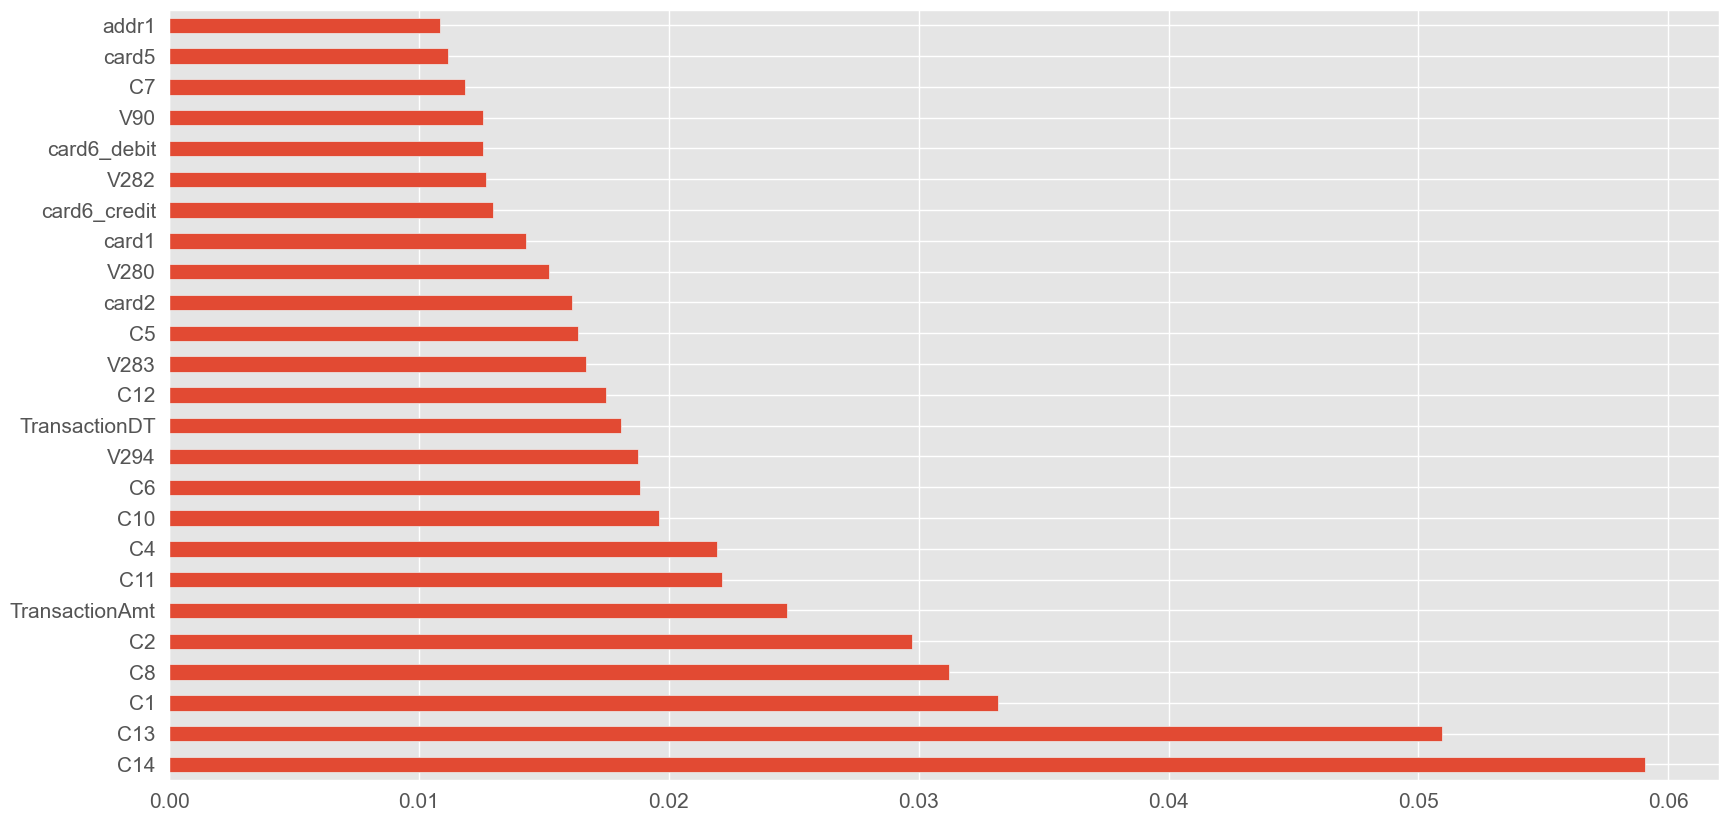

In [47]:
# Feature importances
pd.Series(model_random_forest.feature_importances_, index=X.columns).nlargest(25).plot(kind='barh')
plt.show()

In [39]:
# Previsão dados
model_random_forest_pred = model_random_forest.predict_proba(str_scaler_test)
model_random_forest_pred

array([[0.9565646 , 0.0434354 ],
       [0.97620834, 0.02379166],
       [0.78254501, 0.21745499],
       ...,
       [0.9822832 , 0.0177168 ],
       [0.89056251, 0.10943749],
       [0.90044938, 0.09955062]])

# Salvando modelo

In [41]:
# Importando biblioteca pickle
import pickle

# Salvando o modelo em formato .pkl - Modelo
with open("model_random_forest.pkl", "wb") as f:
    pickle.dump(model_random_forest, f)

# Resultado modelo

In [40]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Modelo" :["Random Forest"],

    "Acurácia" :[model_random_forest_proba]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Modelo,Acurácia
0,Random Forest,"[[0.8963886536276736, 0.10361134637232616], [0..."


# Deploy model

In [42]:
# Resultados final
data_submission['isFraud'] = model_random_forest_pred[:, 1]

In [43]:
# Salvando dataset
data_submission.to_csv("dataset_final.csv")

In [44]:
# Visualizando linhas colunas
data_submission.shape

(506691, 2)

In [45]:
# Visualizando dataset final
data_submission.head(25)

,TransactionID,isFraud
0,3663549,0.043435
1,3663550,0.023792
2,3663551,0.217455
3,3663552,0.056536
4,3663553,0.216768
5,3663554,0.145059
6,3663555,0.152961
7,3663556,0.228468
8,3663557,0.045755
9,3663558,0.097139


# Conclusão

O modelo de machine learning Random Forest é uma abordagem poderosa e eficaz na identificação de fraudes em cartões de crédito. Utilizando técnicas avançadas de aprendizado de máquina, esse algoritmo é capaz de analisar uma grande quantidade de dados e identificar padrões sutis que indicam possíveis atividades fraudulentas.

Um dos pontos fortes do modelo Random Forest é sua capacidade de lidar com conjuntos de dados complexos, onde há uma combinação de diferentes tipos de informações, como valores numéricos, categorias e características temporais. Ele opera criando múltiplas árvores de decisão e combinando seus resultados para obter uma previsão mais precisa.

Para garantir a eficácia do modelo, é essencial realizar uma validação rigorosa da precisão. Isso normalmente é feito dividindo o conjunto de dados em dados de treinamento e dados de teste, onde o modelo é treinado com uma parte dos dados e depois testado com outra parte independente. A acurácia do modelo é avaliada com base em métricas como precisão, recall e F1-score, garantindo que ele seja capaz de identificar tanto fraudes quanto transações legítimas com alta confiabilidade.

Além disso, a etapa final após o desenvolvimento e validação do modelo é o deploy, ou seja, a implementação do modelo em um ambiente de produção. Nesse estágio, o modelo é integrado ao sistema de detecção de fraudes de cartão de crédito, onde ele pode analisar continuamente transações em tempo real e identificar possíveis atividades suspeitas.

É crucial ressaltar que a detecção de fraudes em cartões de crédito é uma área dinâmica, e é essencial atualizar e aprimorar constantemente o modelo de machine learning para acompanhar as mudanças nas táticas dos fraudadores. A colaboração entre cientistas de dados, analistas de segurança e especialistas no setor financeiro é fundamental para garantir a eficácia contínua da detecção de fraudes em cartões de crédito.

# Referência

Referência

Link 1 - https://medium.com/turing-talks/como-fazer-uma-an%C3%A1lise-de-sentimentos-com-vader-21bbe3f3e38d

Link 2 - https://medium.com/equals-lab/uma-breve-introdu%C3%A7%C3%A3o-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099

Link 3 - https://medium.com/data-hackers/pr%C3%A9-processamento-de-dados-com-python-53b95bcf5ff4

Link 4 - https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b

# Citação

Addison Howard, Bernadette Bouchon-Meunier, IEEE CIS, inversion, John Lei, Lynn@Vesta, Marcus2010, Prof. Hussein Abbass. (2019). IEEE-CIS Fraud Detection. Kaggle. https://kaggle.com/competitions/ieee-fraud-detection